<a href="https://colab.research.google.com/github/sdg-wip/abc-test/blob/master/A_bit_of_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.__version__

'0.24.2'

In [0]:
'''Series - one dimensional data containing any data type'''
s = pd.Series([12, 'xyz', 8, 10.2],  index=['Number',  'String',  'Number',  'Float'])
print(s)

Number      12
String     xyz
Number       8
Float     10.2
dtype: object


   City_name  Population
0    Chennai       85429
1    Kolkata       52157
2  Hyderabad       68376


Text(0.5,1,'Population Graph')

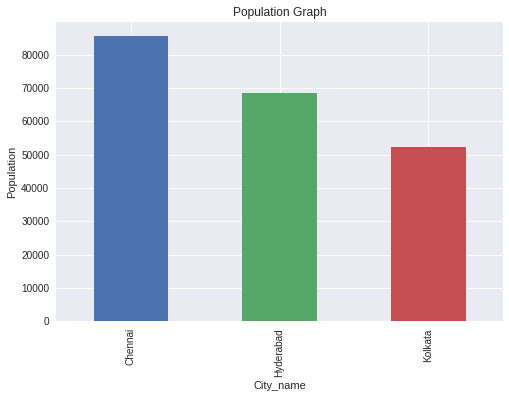

In [0]:
'''DataFrame : Multi Dimensional data structure with rows and columns'''

'''Dataframe from Series'''

city_names = pd.Series(['Chennai','Kolkata', 'Hyderabad'])
population = pd.Series([85429, 52157, 68376])
df = pd.DataFrame({'City_name' : city_names, 'Population' : population})
print(df)
df_plot = df.groupby('City_name')['Population'].sum()
df_plot.plot(kind = 'bar')
plt.ylabel('Population')
plt.title('Population Graph')

In [0]:
'''Creating Multi-Index DataFrame'''

df = pd.DataFrame({'a': [4, 5, 6],
                   'b': [7, 8, 9],
                   'c': [10, 11, 12]},
                   index = pd.MultiIndex.from_tuples([('d', 1), ('d', 2), ('e', 2)], names = ['name', 'value']))
print(df)

            a  b   c
name value          
d    1      4  7  10
     2      5  8  11
e    2      6  9  12


# ***Reading & Writing DataFrame***

---



In [0]:
"""Reading Input from different source"""

df_csv = pd.read_csv("titanic.csv", header = True, nrows = 10, sep = ",")
df_tsv = pd.read_csv("file.tsv", sep = "\t")
df_excel = pd.read_excel(file_name, sheet_name= 'Sheet1')

In [0]:
""" Need to install sqlalchemy, pymysql ------ After // need to provide username(here root) & password(here none root:) ------- xxxx port number ----- databasename"""

""" https://pandas.pydata.org/pandas-docs/stable/io.html#engine-connection-examples """

from sqlalchemy import create_engine
engine = create_engine('mysql + pymysql://root:@localhost:xxxx/databasename')

df_sql = pd.read_sql_table('my_table', engine, columns = ['name'])
df_sql = pd.read_sql_query(SELECT * FROM my_table;', engine)
df_sql = pd.read_sql(SELECT * FROM my_table;, engine)

In [0]:
''' Writing from a dataframe to different format'''

df_csv.to_csv("mycsv.csv")
df_excel.to_excel("myexcel.xlsx", sheet_name = 'sheet1')
df_sql.to_sql("table", engine)

# ***Summary Statistics On DataFrame***

---



In [0]:
""" Basic Summarization of the DataFrame"""

len(df)  # Number of rows in a dataframe
df.info()   # Shows info about dataframe
df.describe() # Shows descriptive statistics for each column
df.head(10) # Shows first 10 rows
df.tail(10) #Shows last 10 rows
df.shape    # Return Shape in A tuple (row * column)
df.ndim     #Return dimension of data
df.columns  # Return list of columns
df.dtypes   # Return datatype of each column
df.get_dtype_counts() # Shows the count of different data types
df.set_index('Column_name')   # Set the column as index of the dataframe
df.reset_index(level = 0, inplace = True) # convert the index as column
df.reset_index(level=['index2', 'index3']) # convert the specific indexes from multiindexed dataframe to columns


In [0]:
'''Creating DataFrame and looking into stats'''

raw_data = {'team': ['kiddies', 'kiddies', 'kiddies', 'kiddies', 'FireDogs', 'FireDogs', 'FireDogs', 'FireDogs', 'Mambaas', 'Mambaas', 'Mambaas', 'Mambaas'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'Lastname': ['Miller', 'Jackson', 'Smith', 'Williams', 'West', 'Jack', 'Ryaner', 'Stone', 'Sloan', 'Piper', 'Roesewood', 'Petaway'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df_score = pd.DataFrame(raw_data, columns = ['team', 'company', 'Lastname', 'preTestScore', 'postTestScore'])  # if we don't specify colmns still it would work but column will come in any order

In [0]:
""" Summary Funtions -  This functions can be applied on dataframes, column of a dataframe, GroupBy object, Expanding and Rolling object"""

df_score['preTestScore'].count()
df_score['preTestScore'].sum()
df_score['preTestScore'].prod()
df_score['preTestScore'].min()
df_score['preTestScore'].max()
df_score['preTestScore'].idxmin()
df_score['preTestScore'].idxmax()
df_score['preTestScore'].mean()
df_score['preTestScore'].median()
df_score['preTestScore'].mode()
df_score['preTestScore'].var()
df_score['preTestScore'].std()
df_score['preTestScore'].sem()
df_score['preTestScore'].skew()
df_score['preTestScore'].kurt()
df_score['preTestScore'].quantile([0.25, 0.75])
df_score['preTestScore'].value_counts()
df_score['preTestScore'].is_unique()
df_score['preTestScore'].nunique()
df_score['preTestScore'].abs()
df_score['preTestScore'].map(lambda x: str(x) + '_exam') # Adding suffixes to column name

In [0]:
""" Vector Function  - This operates on all the column of dataframe or on a single column or series"""

df_score.max(axis = 1)   # Max per row
df_score.min(axis = 1)   # Min per row
df_score['preTestScore'].clip(lower = 10, upper = 50) #Limit lower value to 10 and upper value to 50

# ***Group By & Aggregation***

---

In [0]:
city_names = pd.Series(['Chennai','Kolkata', 'Hyderabad'])
population = pd.Series([85429, 52157, 68376])
sample_df = pd.DataFrame({'City_name' : city_names, 'Population' : population})
print(sample_df)
go = sample_df.groupby('City_name')
print('\n')
for city, city_df in go:
  print(city)
  print(city_df)
  print('\n')
print('\n')
go.get_group('Kolkata')
go.max()

sample_df.groupby('City_name').groups.keys()
sample_df.groupby('City_name').groups['Chennai']

In [0]:
""" Group By - It creates GroupBy object which store data as key value pair where column by which you are grouping is key and grouped dataframe is the value"""

df_score.groupby('team')['preTestScore'].count()     # grouped by values in column team
df_score.groupby('team')['preTestScore'].describe()  #Return Descriptive Statistics on each group
df_score.groupby(['team','company'])['preTestScore'].mean()
df_score.groupby(['team', 'company']).size()
df_score.groupby('team').cumsum()
df_score.groupby('team').cummax()
df_score.groupby('team').cummin()
df_score.groupby('team').cumprod()
list(df_score['preTestScore'].groupby(df_score['team']))  # Show the gruoped object

[('FireDogs', 4     3
  5     4
  6    24
  7    31
  Name: preTestScore, dtype: int64), ('Mambaas', 8     2
  9     3
  10    2
  11    3
  Name: preTestScore, dtype: int64), ('kiddies', 0     4
  1    24
  2    31
  3     2
  Name: preTestScore, dtype: int64)]

In [0]:
'Ranking Based on Value ------ http://www.datasciencemadesimple.com/rank-dataframe-python-pandas-min-max-dense-rank-group/'

df_score["group_rank"] = df_score.groupby('team')["preTestScore"].rank(ascending = 0)   # Rank the dataframe group in descending oreder
df_score["group_rank"] = df_score.groupby('team')["preTestScore"].rank(ascending = 1)   # Rank the dataframe group in ascending oreder
df_score["group_rank"] = df_score.groupby('team')["preTestScore"].rank(ascending = 0, method = 'dense') #rank the dataframe in descending order of score and if found two scores are same then assign the same rank . Dense rank does not skip any rank
df_score["group_rank"] = df_score.groupby('team')["preTestScore"].rank(ascending = 0, method = 'min') #rank the dataframe in descending order of score and if found two scores are same then assign the minimum rank to both the score as shown below
df_score["group_rank"] = df_score.groupby('team')["preTestScore"].rank(ascending = 0, method = 'max') #rank the dataframe in descending order of score and if found two scores are same then assign the maximum rank to both the score as shown below

In [0]:
""" Aggregation --- Multiple Statistics per Group """

df = pd.DataFrame({'AZ': [1, 1, 2, 2],                 
                   'BY': [1, 2, 3, 4],
                   'CX': np.random.randn(4)})
print(df)

df.groupby('AZ').agg('min')                             # Applying single function to each column of group

df.groupby('AZ').agg(['min', 'max'])                    # Applying multiple function to each column of group

df.groupby('AZ')['BY'].agg(['min', 'max'])               # Applying multiple function to a specific column

df.groupby('AZ').agg({'BY': ['min', 'max'], 'CX': 'sum'}) # Applying different function to different column of group


   AZ  BY        CX
0   1   1 -0.051527
1   1   2  0.564941
2   2   3 -0.199564
3   2   4  0.388373


BY            CX
   min max       sum
AZ                  
1    1   2  0.513414
2    3   4  0.188809

In [0]:
""" We can also use lambda function and apply in specific column"""

aggregations = {
    'BY':'sum',
    'CX': lambda x: tuple(np.abs(x))               # if the function return multiple value, convert it to tuple
}

df.groupby('AZ').agg(aggregations)

,BY,CX
AZ,,
1,3,"(0.05152701295784001, 0.5649408273921499)"
2,7,"(0.19956438682946662, 0.38837308167680185)"


In [0]:
""" Renaming grouped statistics from groupby operation """

grouped = df.groupby('AZ')['BY'].agg(['min', 'max', 'mean'])
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
print(grouped)

# ***Apply Function On Dataframe***

---



In [0]:
""" Apply Function on dataFrame - It applies on the columns of a dataframe"""

date_list = {'date': ['2000-10-21', '2004-09-17', '2007-12-12']}
           
df_date = pd.DataFrame(date_list)

df_date

,date
0,2000-10-21
1,2004-09-17
2,2007-12-12


In [0]:
def extract_year(col):
    return col.split('-')[0]


df_date['year'] = df_date['date'].apply(extract_year)


In [0]:
def calculate_age(year, current_year):
    return current_year - int(year)
  
df_date['age'] = df_date['year'].apply(calculate_age, current_year=2018)

df_date

,date,year,age
0,2000-10-21,2000,18
1,2004-09-17,2004,14
2,2007-12-12,2007,11


In [0]:
""" Apply function to every row"""


def introduce(df):
    return "I was born in "+ str(df.year) +" and now I am"+ str(df['age']) +"year old"
  
df_date['introduce'] = df_date.apply(introduce, axis=1)

df_date

,date,year,age,introduce
0,2000-10-21,2000,18,I was born in 2000 and now I am18year old
1,2004-09-17,2004,14,I was born in 2004 and now I am14year old
2,2007-12-12,2007,11,I was born in 2007 and now I am11year old


In [0]:
""" Map Function - works on element of series"""

def get_milenium(col):
  return str(int(col)//1000)+"K"

df_date['milenium'] = df_date['year'].map(get_milenium)

df_date

,date,year,age,milenium
0,2000-10-21,2000,18,2K
1,2004-09-17,2004,14,2K
2,2007-12-12,2007,11,2K


In [0]:
" Map function provide new value for old one when passed as dictinary"

df_date['new_age'] = df_date['age'].map({ 18 : "Young", 14 : "Child", 11 : "Kid"})

df_date

,date,year,age,milenium,new_age
0,2000-10-21,2000,18,2K,Young
1,2004-09-17,2004,14,2K,Child
2,2007-12-12,2007,11,2K,Kid


**An example of using apply function in some serious data munging**

In [0]:
invalid_df = pd.DataFrame({'country' : ['Switzerland', 'Denmark', 'Italy','India', 'Norway', 'Germany', 'France', 'Portugal'],
                            'zip': [1234, 5678, 9876, 4321, 5342, 7658, 9872, 2345]}, columns = ['country', 'zip'])
invalid_df

,country,zip
0,Switzerland,1234
1,Denmark,5678
2,Italy,9876
3,India,4321
4,Norway,5342
5,Germany,7658
6,France,9872
7,Portugal,2345


In [0]:
valid_list = []
col_name = invalid_df.columns
for i in col_name:
    s = "{'col': '" + i + "', 'reco': ''}]"
    valid_list.append(s)
valid = ", ".join(valid_list)
invalid_df["Validity"] = valid

In [0]:
column_dict = {'country' : 'India', 'zip': 2345}

col_list = list(column_dict.keys())
type(col_list)

cols = list(invalid_df.columns)

print (col_list, cols)

['country', 'zip'] ['country', 'zip', 'Validity']


In [0]:
def validity(df, cols, cols_list):
  z = []
  for col1, col2 in zip(cols,col_list):
    print(col1, col2)
    if col1 == col2:
      if df[col1] != column_dict[col2]:
        xyz = "{'col': '" + col1  + "', 'reco': '" + str(column_dict[col1]) + "'}"
        #print(xyz)
      else:
        xyz = "{'col': '" + col1  + "', 'reco': ''}"
      z.append(xyz)
  return z

In [0]:
invalid_df["Validity_Reco"] = invalid_df.apply(lambda df: validity(df, cols = cols, cols_list = col_list), axis = 1)
invalid_df

country country
zip zip
country country
zip zip
country country
zip zip
country country
zip zip
country country
zip zip
country country
zip zip
country country
zip zip
country country
zip zip


,country,zip,Validity,Validity_Reco
0,Switzerland,1234,"[{'col':country, 'reco': }], [{'col':zip, 'rec...","[{'col': 'country', 'reco': 'India'}, {'col': ..."
1,Denmark,5678,"[{'col':country, 'reco': }], [{'col':zip, 'rec...","[{'col': 'country', 'reco': 'India'}, {'col': ..."
2,Italy,9876,"[{'col':country, 'reco': }], [{'col':zip, 'rec...","[{'col': 'country', 'reco': 'India'}, {'col': ..."
3,India,4321,"[{'col':country, 'reco': }], [{'col':zip, 'rec...","[{'col': 'country', 'reco': ''}, {'col': 'zip'..."
4,Norway,5342,"[{'col':country, 'reco': }], [{'col':zip, 'rec...","[{'col': 'country', 'reco': 'India'}, {'col': ..."
5,Germany,7658,"[{'col':country, 'reco': }], [{'col':zip, 'rec...","[{'col': 'country', 'reco': 'India'}, {'col': ..."
6,France,9872,"[{'col':country, 'reco': }], [{'col':zip, 'rec...","[{'col': 'country', 'reco': 'India'}, {'col': ..."
7,Portugal,2345,"[{'col':country, 'reco': }], [{'col':zip, 'rec...","[{'col': 'country', 'reco': 'India'}, {'col': ..."


# ***Apply vs Applymap vs Map***

---





DataFrame.apply operates on entire row/column of a DataFrame

Series.map/Series.apply operates on each element of series

DataFrame.applymap operates on each element of DataFrame

Map can't be applied on DataFrame

In below example f function can't applied using applymap as it opeates elementwise and function will try to find max of single element and throw error

frame.apply(f)/fname.map(f) - > either of this will throw error

f function can't be applied to any of the column using apply/map function as it opeates elementwise and function will try to find max of single element and throw error

In [0]:
""" Apply vs Applymap vs Map"""

frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])

f = lambda x: x.max() - x.min()

frame.applymap(np.around)

In [0]:
# Cleaning strings in  a dataframe using apply function

university_town = [('Alabama[edit]\n', 'Auburn (Auburn University)[1]\n'),
 ('Alabama[edit]\n', 'Florence (University of North Alabama)\n'),
 ('Alabama[edit]\n', 'Jacksonville (Jacksonville State University)[2]\n'),
 ('Alabama[edit]\n', 'Livingston (University of West Alabama)[2]\n'),
 ('Alabama[edit]\n', 'Montevallo (University of Montevallo)[2]\n')]

df_university = pd.DataFrame(university_town,columns = ['state', 'RegionName'] )

df_university

def get_citystate(item):
  if ' (' in item:
    return item[:item.find(' (')]
  elif '[' in item:
    return item[:item.find('[')]
  else:
    return item
  

  
df_university =  df_university.applymap(get_citystate)

df_university
  

# Slicing & Filter

---



Three main  components of Pandas Dataframe are index, column and data.  Often, row or column is refered as axis. each row and each column have a specific label that can be used to reference them.

each row and column can also be referenced by an integer which is called integer location.

There are three primary ways to select subsets from a DataFrame — [ ], .loc and .iloc

.loc makes selection by labels. It can simulataneously select rows and columns

df.loc[row_selection, column_selection]

.iloc uses only integer location to select rows or columns

Normally data is imported without setting an index.** set_index** method to be used to set a column as an index.

misspell row or column labels will get a KeyError

If you forgot to use a list to contain multiple columns you will also get a KeyError

If you don’t specify a column to be the index when first reading in the data, pandas will use the integers 0 to n-1 as the index. This creates a RangeIndex object which  is similar to Python range objects.

In [0]:
from google.colab import files
uploaded = files.upload()




Saving titanic.csv to titanic (1).csv


In [0]:
import io
df_titanic = pd.read_csv(io.StringIO(uploaded['titanic.csv'].decode('utf-8')), sep =',')

If a column is not specified to be used as index while reading the data, pandas will use the integers 0 to n-1 as the index. This technically creates a **RangeIndex** object. This object is similar to Python **range** objects. Converting both of these objects to a list produces the exact same thing:

In [0]:
df_titanic.index

range(0, 891)

print(list(df_titanic.index), list(range(0,891)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [0]:
print(df_titanic.columns)

df_titanic.loc[:, 'Sex']  # Selecting One column

df_titanic.loc[:, ['Pclass', 'Name', 'Sex', 'Age']] # Selecting Multiple Column

df_titanic.loc[[2,4,5], ['Name', 'Sex']] # Selecting rows and column 

df_titanic.iloc[[2, 4, 5], [6, 8, 10]] # Selecting rows and column w=using iloc

df_titanic['Name'] # Efficient ways to select column

df_titanic[['Name', 'Pclass']] # Efficient way to select multiple column

df2_idx = df_titanic.set_index('Name') # Making a column as index

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [0]:
# Boolean indexing to retrieve subset of rows

df_titanic[(df_titanic['Fare'] > 10000) & (df_titanic['Embarked'] == 'S')].head()
df_titanic[df_titanic['Cabin'].isin(['C85', 'E46', 'C103', 'G6'])]
df_titanic[~(df_titanic['Fare'] > 10000)]


# *** Cleaning  data and dealing with Missing Values***

---



In [0]:
# Selecting rows with Null values

df_titanic[df_titanic.isnull().any(axis =1)]
df_titanic[df_titanic.isnull().all(axis =1)]

# get the percentage of missing values in each column

df_titanic.isnull().mean().round(4) * 100
df_titanic.isnull().sum()

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [0]:
# Checking missing value in a single column

df_titanic['Cabin'].isnull().sum()/len(df_titanic)

0.7710437710437711

In [0]:
df_weather = pd.DataFrame({'day': ['2019-02-01', '2019-02-05', '2019-02-12', '2019-02-14', '2019-02-18', '2019-02-22', '2019-02-26', '2019-02-27', '2019-02-28'],
                           'temparature': [32.0, np.NaN, 28.0, np.NaN, 32.0, np.NaN, np.NaN, 34.0, 40.0],
                           'windspeed': [6.0,9.0,np.NaN,7.0,np.NaN,np.NaN,np.NaN,8.0,12.0],
                            'event': ['Rain', 'Sunny', 'Snow', np.NaN, 'Rain', 'Sunny', np.NaN, 'Cloudy', 'Sunny']}, columns = ['day', 'temparature', 'windspeed', 'event'])

In [0]:
df_weather.set_index('day',inplace=True)
df_weather


,temparature,windspeed,event
day,,,
2019-02-01,32.0,6.0,Rain
2019-02-05,NaN,9.0,Sunny
2019-02-12,28.0,NaN,Snow
2019-02-14,NaN,7.0,NaN
2019-02-18,32.0,NaN,Rain
2019-02-22,NaN,NaN,Sunny
2019-02-26,NaN,NaN,NaN
2019-02-27,34.0,8.0,Cloudy
2019-02-28,40.0,12.0,Sunny


In [0]:
# Filling Missing Values with 0

new_df = df_weather.fillna(0)
new_df

,temparature,windspeed,event
day,,,
2019-02-01,32.0,6.0,Rain
2019-02-05,0.0,9.0,Sunny
2019-02-12,28.0,0.0,Snow
2019-02-14,0.0,7.0,0
2019-02-18,32.0,0.0,Rain
2019-02-22,0.0,0.0,Sunny
2019-02-26,0.0,0.0,0
2019-02-27,34.0,8.0,Cloudy
2019-02-28,40.0,12.0,Sunny


In [0]:
# Filling different Columns with different values using dictinary

new_df = df_weather.fillna({ 'temperature': 0, 'windspeed': 0, 'event': 'No Event'})
new_df

,temparature,windspeed,event
day,,,
2019-02-01,32.0,6.0,Rain
2019-02-05,NaN,9.0,Sunny
2019-02-12,28.0,0.0,Snow
2019-02-14,NaN,7.0,No Event
2019-02-18,32.0,0.0,Rain
2019-02-22,NaN,0.0,Sunny
2019-02-26,NaN,0.0,No Event
2019-02-27,34.0,8.0,Cloudy
2019-02-28,40.0,12.0,Sunny


In [0]:
# Filling with prceeding data

new_df = df_weather.fillna(method="ffill")
new_df

,temperature,windspeed,event
day,,,
2019-01-02,32.0,6.0,Rain
2019-05-02,32.0,9.0,Sunny
2019-12-02,28.0,9.0,Snow
2019-02-14,28.0,7.0,Snow
2019-02-18,32.0,7.0,Rain
2019-02-22,32.0,7.0,Sunny
2019-02-26,32.0,7.0,Sunny
2019-02-27,34.0,8.0,Cloudy
2019-02-28,40.0,12.0,Sunny


In [0]:
# Filling with following data

new_df = df_weather.fillna(method="bfill")
new_df

In [0]:
# Axis sholud be "index" or "columns"

new_df = df_weather.fillna(method="bfill", axis="columns") 
new_df

,temperature,windspeed,event
day,,,
2019-01-02,32,6,Rain
2019-05-02,9,9,Sunny
2019-12-02,28,Snow,Snow
2019-02-14,7,7,NaN
2019-02-18,32,Rain,Rain
2019-02-22,Sunny,Sunny,Sunny
2019-02-26,NaN,NaN,NaN
2019-02-27,34,8,Cloudy
2019-02-28,40,12,Sunny


In [0]:
# Limiting the forward fill only upto 1 step

new_df = df_weather.fillna(method="ffill",limit=1)
new_df

,temperature,windspeed,event
day,,,
2019-01-02,32.0,6.0,Rain
2019-05-02,32.0,9.0,Sunny
2019-12-02,28.0,9.0,Snow
2019-02-14,28.0,7.0,Snow
2019-02-18,32.0,7.0,Rain
2019-02-22,32.0,NaN,Sunny
2019-02-26,NaN,NaN,Sunny
2019-02-27,34.0,8.0,Cloudy
2019-02-28,40.0,12.0,Sunny


In [0]:
# Interpolating the missing data. There are many method to interpolate like linear, quadratic, cubic, piecewise_polynomial etc.

new_df = df_weather.interpolate()
new_df

In [0]:
# Interpolating using time

new_df = df_weather.interpolate(method="time") 
new_df

,temperature,windspeed,event
day,,,
2019-01-02,32.000000,6.000000,Rain
2019-05-02,40.000000,9.000000,Sunny
2019-12-02,28.000000,12.000000,Snow
2019-02-14,31.485030,7.000000,NaN
2019-02-18,32.000000,7.307692,Rain
2019-02-22,31.389222,7.615385,Sunny
2019-02-26,31.341317,7.923077,NaN
2019-02-27,34.000000,8.000000,Cloudy
2019-02-28,40.000000,12.000000,Sunny


In [0]:
# Dropping Null Values

new_df = df_weather.dropna()
new_df = df_weather.dropna(how = 'all')
new_df = df_weather.dropna(thresh = 2) # drop when valid value count is less than 2

In [0]:
# Replacing Values Of a DataFrame

new_df = df_weather.replace(np.NAN, 30)         # Replacing any value with new one 
new_df = df_weather.replace([np.NAN, 32], 30)   #Replacing Multiple Values with one single values
new_df = df_weather.replace({'temperature': 32.0, 'windspeed': 12, 'event': np.NAN}, 15)  # Replacing different values based on columns
new_df = df_weather.replace({32.0 : 30.0, 9.0 : 8.0, np.NAN : 'Sunny'})     #Replacing each value separately
new_df


,temperature,windspeed,event
day,,,
2019-01-02,30,6,Rain
2019-05-02,Sunny,8,Sunny
2019-12-02,28,Sunny,Snow
2019-02-14,Sunny,7,Sunny
2019-02-18,30,Sunny,Rain
2019-02-22,Sunny,Sunny,Sunny
2019-02-26,Sunny,Sunny,Sunny
2019-02-27,34,8,Cloudy
2019-02-28,40,12,Sunny


In [0]:
# Replace with regex

df_extrachar = df_weather.replace({32.0 : '32.0 F', 9.0 : '8.0 mph'})
df_removedchar = df_extrachar.replace({'temperature': '[A-Za-z]', 'windspeed': '[A-Za-z]'}, '',regex = True)   #Replacing extra character using regex
df_removedchar['temperature'].astype('float')

day
2019-01-02    32.0
2019-05-02     NaN
2019-12-02    28.0
2019-02-14     NaN
2019-02-18    32.0
2019-02-22     NaN
2019-02-26     NaN
2019-02-27    34.0
2019-02-28    40.0
Name: temperature, dtype: float64

In [0]:
# Replacing List of values or Mapping values

df_marks = pd.DataFrame({'Score': ["Average", "Good", "Excellent", "Improvement Required", "Good", "Excellent"],
                          'Student': ['Inu', 'PK', 'POO', 'KL', 'NZ', 'MSD']}, columns = ['Student', 'Score'])
df_newmarks = df_marks.replace(['Improvement Required', 'Average', 'Good', 'Excellent'], [1, 2, 3, 4])
df_newmarks

,Student,Score
0,Inu,2
1,PK,3
2,POO,4
3,KL,1
4,NZ,3
5,MSD,4


In [0]:
# Conditional replace pandas

df.loc[df['my_channel'] > 20000, 'my_channel'] = 0  # loc + boolean indexing

df['my_channel'] = df['my_channel'].mask(df['my_channel'] > 20000, 0)   # mask + boolean indexing
df['my_channel'].mask(df['my_channel'] > 20000, 0, inplace=True)   # mask + boolean indexing inplace

df['my_channel'] = np.where(df['my_channel'] > 20000, 0, df['my_channel'])  # np.where + Boolean indexing

In [0]:
# Insering Missing Date index using DatetimeIndex

dt = pd.date_range("02-01-2017","02-28-2017")
idx = pd.DatetimeIndex(dt)
df_weather = df_weather.reindex(idx)
df_weather

# ***Dealing With String Values in DataFrame***

---



In [0]:
# checking for values in a column using str method

df_titanic['Sex'].str.contains('male')


In [0]:
# Extracting values using str method with regex and converting it to float

df_sample = pd.DataFrame({'Identifier': [1905, 1929, 2386, 4321, 3218, 5643, 8132, 2531, 4598, 4884, 8561],
   'Year': ["1888", "1839", "38-54", "[1897?]", "1865", "1860-63", "1873", "1866", "1899", "1814", "1820"]})

extr = df_sample['Year'].str.extract(r'^(\d{4})', expand=False)

df_sample['Year'] = pd.to_numeric(extr)

df_sample['Year'].dtype

dtype('float64')

In [0]:
 # Splitting a text column into two different columns
  
  df_text = pd.DataFrame({'Name': ['John_Larter', 'Robert_Junior', 'Jonny_Depp'], 
                    'Age':[32, 34, 36]})
  df_text[['First','Last']] = df_text['Name'].str.split("_",expand=True) 
  df_text

,Age,Name,First,Last
0,32,John_Larter,John,Larter
1,34,Robert_Junior,Robert,Junior
2,36,Jonny_Depp,Jonny,Depp


In [0]:
# replacing string values with new one in dataframe

df_titanic['Sex'] = df_titanic['Sex'].str.replace('male', 'M', regex = True) # regex option is available in pandas '0.24.0'

df_titanic


                                                  



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",feM,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",feM,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",feM,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",M,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",M,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",M,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",feM,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",feM,14.0,1,0,237736,30.0708,NaN,C


In [0]:
# Reverse Lower Case of Alphabetic Word

repl = lambda m:m.group(0)[::-1]
pd.Series(['foo 123', 'bar baz', np.nan]).str.replace(r'[a-z]+', repl)

0    oof 123
1    rab zab
2        NaN
dtype: object

# ***Crosstab***

---
Crosstab is widely used in survey results to find out interrelationships and interactions between variables. It creates table from the multivariate frequency distribution of variables.


In [0]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['infantry', 'infantry', 'cavalry', 'cavalry', 'infantry', 'infantry', 'cavalry', 'cavalry','infantry', 'infantry', 'cavalry', 'cavalry'], 
        'experience': ['veteran', 'rookie', 'veteran', 'rookie', 'veteran', 'rookie', 'veteran', 'rookie','veteran', 'rookie', 'veteran', 'rookie'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

df_regiment = pd.DataFrame(raw_data)

df_regiment

,company,experience,name,postTestScore,preTestScore,regiment
0,infantry,veteran,Miller,25,4,Nighthawks
1,infantry,rookie,Jacobson,94,24,Nighthawks
2,cavalry,veteran,Ali,57,31,Nighthawks
3,cavalry,rookie,Milner,62,2,Nighthawks
4,infantry,veteran,Cooze,70,3,Dragoons
5,infantry,rookie,Jacon,25,4,Dragoons
6,cavalry,veteran,Ryaner,94,24,Dragoons
7,cavalry,rookie,Sone,57,31,Dragoons
8,infantry,veteran,Sloan,62,2,Scouts
9,infantry,rookie,Piger,70,3,Scouts


In [0]:
pd.crosstab(df_regiment.regiment, df_regiment.company, margins = True) # pd.crosstab(variable that should come in row, variable that should come in column, margin for total)

company,cavalry,infantry,All
regiment,,,
Dragoons,2,2,4
Nighthawks,2,2,4
Scouts,2,2,4
All,6,6,12


In [0]:
pd.crosstab([df_regiment.company, df_regiment.experience], df_regiment.regiment,  margins=True)

In [0]:
pd.crosstab(df_regiment.company, [df_regiment.experience, df_regiment.regiment],  margins=True)

experience   rookie                    veteran                   All
regiment   Dragoons Nighthawks Scouts Dragoons Nighthawks Scouts    
company                                                             
cavalry           1          1      1        1          1      1   6
infantry          1          1      1        1          1      1   6
All               2          2      2        2          2      2  12

In [0]:
pd.crosstab([df_regiment.company, df_regiment.experience], df_regiment.regiment,  normalize = 'index')  # normalize by dividing all values by sum of all values

In [0]:
pd.crosstab(df_regiment.regiment, df_regiment.company, values = df_regiment.postTestScore, aggfunc = np.average, margins = True)

company,cavalry,infantry,All
regiment,,,
Dragoons,75.5,47.500000,61.500000
Nighthawks,59.5,59.500000,59.500000
Scouts,66.0,66.000000,66.000000
All,67.0,57.666667,62.333333


## ***Concatenation***

---



In [0]:
north_india = pd.DataFrame({'City' : ['Delhi', 'Kolkata', 'Mumbai'],
                             'Temparature': [6, 12, 22]})

In [0]:
south_india = pd.DataFrame({'City': ['Chennai', 'Hyderabad', 'Bangalore'],
                             'Temparature': [23, 16, 15]})

In [0]:
india = pd.concat([north_india, south_india])   # Concatinating row wise

In [0]:
india = pd.concat([north_india, south_india], ignore_index = True) # Creating continuous index


In [0]:
india = pd.concat([north_india, south_india], keys = ['North', 'South']) # Adding keys to lable
india.loc["South"]


,City,Temparature
0,Chennai,23
1,Hyderabad,16
2,Bangalore,15


In [0]:
south_india_humidity = pd.DataFrame({'City': ['Chennai', 'Hyderabad', 'Bangalore'],
                             'Humidity': [92, 78, 65]})

In [0]:
india_weather = pd.concat([south_india, south_india_humidity])  #if we concatenate using two different column
india_weather

,City,Humidity,Temparature
0,Chennai,NaN,23.0
1,Hyderabad,NaN,16.0
2,Bangalore,NaN,15.0
0,Chennai,92.0,NaN
1,Hyderabad,78.0,NaN
2,Bangalore,65.0,NaN


In [0]:
india_weather = pd.concat([south_india, south_india_humidity], axis = 1)  # Conatenate columns

In [0]:
south_india_humidity_unorder = pd.DataFrame({'City': ['Bangalore', 'Chennai'],
                             'Humidity': [65, 92]}, index = [2,0])               # If index is different in dataframes, before concatenation we should explicitly provide index in the dataframe

pd.concat([south_india,south_india_humidity_unorder], axis = 1)

,City,Temparature,City,Humidity
0,Chennai,23,Chennai,92.0
1,Hyderabad,16,NaN,NaN
2,Bangalore,15,Bangalore,65.0


# ***Merging Two DataFrames***

---

Peforms sql like joins

In [0]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
left_frame
right_frame

,key,right_value
0,2,f
1,3,g
2,4,h
3,5,i
4,6,j


In [0]:
df_merged = pd.merge(left_frame, right_frame, on='key') # By Default, It will do inner join

df_merged

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h


In [0]:
left_frame = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35, 38],
})

left_frame

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,38


In [0]:
right_frame = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "humidity": [65,68,71],
})

right_frame


,city,humidity
0,chicago,65
1,new york,68
2,san diego,71


In [0]:
merged_frame = pd.merge(left_frame, right_frame, on="city", how="inner")

merged_frame

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [0]:
merged_frame = pd.merge(left_frame, right_frame, on="city", how="left")

merged_frame

,city,temperature,humidity
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,35,NaN
3,baltimore,38,NaN


In [0]:
merged_frame = pd.merge(left_frame, right_frame, on="city", how="right")

merged_frame

,city,temperature,humidity
0,new york,21.0,68
1,chicago,14.0,65
2,san diego,NaN,71


In [0]:
merged_frame = pd.merge(left_frame, right_frame, on="city", how="outer")

merged_frame

,city,temperature,humidity
0,new york,21.0,68.0
1,chicago,14.0,65.0
2,orlando,35.0,NaN
3,baltimore,38.0,NaN
4,san diego,NaN,71.0


In [0]:
merged_frame = pd.merge(left_frame, right_frame, on="city", how="outer", indicator=True)

merged_frame

,city,temperature,humidity,_merge
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,35.0,NaN,left_only
3,baltimore,38.0,NaN,left_only
4,san diego,NaN,71.0,right_only


In [0]:
left = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})

left

,city,humidity,temperature
0,new york,65,21
1,chicago,68,14
2,orlando,71,35
3,baltimore,75,38


In [0]:
right = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})

right

,city,humidity,temperature
0,chicago,65,21
1,new york,68,14
2,san diego,71,35


In [0]:
left_right = pd.merge(left,right,on="city",how="outer", suffixes=('_first','_second'))
leftright

,city,humidity_first,temperature_first,humidity_second,temperature_second
0,new york,65.0,21.0,68.0,14.0
1,chicago,68.0,14.0,65.0,21.0
2,orlando,71.0,35.0,NaN,NaN
3,baltimore,75.0,38.0,NaN,NaN
4,san diego,NaN,NaN,71.0,35.0


In [0]:
# Join two dataframe on multiple columns

left = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame({
	'id':[1,2,3,4,5],
   'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5']})

left_right = pd.merge(left,right,on=['id','subject_id'])

left_right

,Name_x,id,subject_id,Name_y
0,Alice,4,sub6,Bryce
1,Ayoung,5,sub5,Betty


In [0]:
# Join two dataframes on multiple column ( useful when columns names are different)


left = pd.DataFrame({
   'id1':[1,2,3,4,5],
   'Name1': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id1':['sub1','sub2','sub4','sub6','sub5']})

right = pd.DataFrame({
	'id2':[1,2,3,4,5],
   'Name2': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id2':['sub2','sub4','sub3','sub6','sub5']})

left
right



,Name2,id2,subject_id2
0,Billy,1,sub2
1,Brian,2,sub4
2,Bran,3,sub3
3,Bryce,4,sub6
4,Betty,5,sub5


In [0]:
left_right = pd.merge(left, right, left_on=['id1','subject_id1'], right_on = ['id2','subject_id2'])
left_right

,Name1,id1,subject_id1,Name2,id2,subject_id2
0,Alice,4,sub6,Bryce,4,sub6
1,Ayoung,5,sub5,Betty,5,sub5


In [0]:
# Merging DataFrames using index value

left.set_index(['id1', 'subject_id1'], inplace = True)

In [0]:
left_right = pd.merge(left, right, left_index = True, right_on = ['id2','subject_id2'])
left_right

,Name1,Name2,id2,subject_id2
3,Alice,Bryce,4,sub6
4,Ayoung,Betty,5,sub5


## ***Pivot Table***

---

It helps to arrange statistics in order to retrieve useful information.  Index and columns can be taken from an existing dataframe.

In [0]:
happy_df = pd.DataFrame({'Country': ['Switzerland','Iceland','Denmark','Norway','Canada','Finland','Netherlands','Sweden','New Zealand','Australia','Switzerland','Iceland','Denmark','Norway','Canada','Finland','Netherlands','Sweden','New Zealand','Australia'],
                         'Region': ['Western Europe','Western Europe','Western Europe','Western Europe','North America','Western Europe','Western Europe','Western Europe', 'Australia', 'Australia','Western Europe','Western Europe','Western Europe','Western Europe','North America','Western Europe','Western Europe','Western Europe', 'Australia','Australia'],
                         'Happiness Rank': [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,2.0,3.0,1.0,5.0,4.0,7.0,8.0,6.0,10.0,9.0],
                         'Happiness Score': [7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286, 7.284, 7.527, 7.522, 7.427, 7.406,7.427, 7.406, 7.378, 7.364,7.378, 7.364],
                         'Economy': [1.39651, 1.30232, 1.32548, 1.45900, 1.32629, 1.29205, 1.32944, 1.33171, 1.25018, 1.33358,1.39651, 1.30232, 1.32548, 1.45900, 1.32629,1.29205, 1.32944, 1.33171, 1.25018, 1.33358],
                         'Year': [2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2018,2018,2018,2018,2018]},
                          columns = ['Country','Region','Happiness Rank', 'Happiness Score', 'Economy', 'Year'])

happy_df

,Country,Region,Happiness Rank,Happiness Score,Economy,Year
0,Switzerland,Western Europe,1.0,7.587,1.39651,2015
1,Iceland,Western Europe,2.0,7.561,1.30232,2015
2,Denmark,Western Europe,3.0,7.527,1.32548,2015
3,Norway,Western Europe,4.0,7.522,1.45900,2015
4,Canada,North America,5.0,7.427,1.32629,2015
5,Finland,Western Europe,6.0,7.406,1.29205,2015
6,Netherlands,Western Europe,7.0,7.378,1.32944,2015
7,Sweden,Western Europe,8.0,7.364,1.33171,2015
8,New Zealand,Australia,9.0,7.286,1.25018,2015
9,Australia,Australia,10.0,7.284,1.33358,2015


In [0]:
pd.pivot_table(happy_df, index = 'Year', values="Happiness Score")

,Happiness Score
Year,
2015,7.4342
2016,7.4618
2018,7.3780


In [0]:
pd.pivot_table(happy_df, index = 'Region', values="Happiness Score")

,Happiness Score
Region,
Australia,7.328000
North America,7.427000
Western Europe,7.455357


In [0]:
pd.pivot_table(happy_df, index = ['Region', 'Year'], values="Happiness Score")

Happiness Score
Region         Year                 
Australia      2015         7.285000
               2018         7.371000
North America  2015         7.427000
               2016         7.427000
Western Europe 2015         7.477857
               2016         7.470500
               2018         7.382667

In [0]:
pd.pivot_table(happy_df, index= 'Region', columns='Year', values="Happiness Score")

Year,2015,2016,2018
Region,,,
Australia,7.285000,NaN,7.371000
North America,7.427000,7.4270,NaN
Western Europe,7.477857,7.4705,7.382667


In [0]:
pd.pivot_table(happy_df, index= 'Region', values= "Happiness Score",
               aggfunc= [np.mean, np.median, min, max, np.std])

,mean,median,min,max,std
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia,7.328000,7.3250,7.284,7.378,0.049987
North America,7.427000,7.4270,7.427,7.427,0.000000
Western Europe,7.455357,7.4165,7.364,7.587,0.080580


In [0]:
# margins : boolean, default False Add all row / columns (e.g. for subtotal / grand totals), fill_value : scalar, default None;Value to replace missing values with

pd.pivot_table(happy_df, index= 'Region', columns='Year', values="Happiness Score", margins = True, margins_name = 'Sum of Year', fill_value = 0) 

Year,2015,2016,2018,Sum of Year
Region,,,,
Australia,7.285000,0.0000,7.371000,7.328000
North America,7.427000,7.4270,0.000000,7.427000
Western Europe,7.477857,7.4705,7.382667,7.455357
Sum of Year,7.434200,7.4618,7.378000,7.427050


In [0]:
happy_df['Year'] = pd.to_datetime(happy_df['Year'])
happy_df.pivot_table(index = pd.Grouper(freq = 'Y', key = 'Year'), columns = 'Region')

Economy                              Happiness Rank  \
Region     Australia North America Western Europe      Australia   
Year                                                               
1970-12-31   1.29188       1.32629       1.348073            9.5   

                                        Happiness Score                \
Region     North America Western Europe       Australia North America   
Year                                                                    
1970-12-31           4.5            4.5           7.328         7.427   

                           
Region     Western Europe  
Year                       
1970-12-31       7.455357

# ***Reshaping With Melt***

---

It  is useful to massage a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables

In [0]:
melt_df = pd.DataFrame({"location" : ['CityA', 'CityB'],
                  "Temperature" : ["Predict", "Actual"],
                  "Jan-2010" : [24, 22],
                  "Feb-2010" : [30, 32],
                  "Mar-2010" : [45, 43]}, columns=['location', 'Temperature','Jan-2010', 'Feb-2010', 'Mar-2010'])
print(melt_df)

  location Temperature  Jan-2010  Feb-2010  Mar-2010
0    CityA     Predict        24        30        45
1    CityB      Actual        22        32        43


In [0]:
melted_df = pd.melt(melt_df, id_vars=["location", "Temperature"], var_name="Date", value_name="Temp_Value")   #id_vars : tuple, list, or ndarray, optional; Column(s) to use as identifier variables.
print(melted_df)

  location Temperature      Date  Temp_Value
0    CityA     Predict  Jan-2010          24
1    CityB      Actual  Jan-2010          22
2    CityA     Predict  Feb-2010          30
3    CityB      Actual  Feb-2010          32
4    CityA     Predict  Mar-2010          45
5    CityB      Actual  Mar-2010          43


In [0]:
df_sorted = melted_df.sort_values(["location", "Temp_Value"], ascending = [True, False])
print(df_sorted)

  location Temperature      Date  Temp_Value
4    CityA     Predict  Mar-2010          45
2    CityA     Predict  Feb-2010          30
0    CityA     Predict  Jan-2010          24
5    CityB      Actual  Mar-2010          43
3    CityB      Actual  Feb-2010          32
1    CityB      Actual  Jan-2010          22


# ***Reshaping With Stack & Unstack***

---

In addition to the pivoting methods, pandas also has the two related concepts of stacking and unstacking data. These are primarily designed to operate on multi-indexed dataframes.

stack -> columns to index

unstack -> index to column

In [0]:
df_dollar = pd.DataFrame({'Date' : ['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-04', '2000-01-04', '2000-01-04', '2000-01-05', '2000-01-05', '2000-01-05', '2000-01-06', '2000-01-06', '2000-01-06'],
                           'Person' : ['Michael', 'George', 'Lisa', 'Michael', 'George', 'Lisa', 'Michael', 'George', 'Lisa',  'Michael', 'George', 'Lisa'],
                           'Dollar' : [200, 500, 450, 180.5, 450, 448, 177, 420, 446, 150, 300, 360]}, columns = ['Date', 'Person', 'Dollar'])

df_dollar

,Date,Person,Dollar
0,2000-01-01,Michael,200.0
1,2000-01-01,George,500.0
2,2000-01-01,Lisa,450.0
3,2000-01-04,Michael,180.5
4,2000-01-04,George,450.0
5,2000-01-04,Lisa,448.0
6,2000-01-05,Michael,177.0
7,2000-01-05,George,420.0
8,2000-01-05,Lisa,446.0
9,2000-01-06,Michael,150.0


In [0]:
df_multi = df_dollar.set_index(['Date', 'Person'])
df_n = df_multi.stack()
df_n

Date        Person         
2000-01-01  Michael  Dollar    200.0
            George   Dollar    500.0
            Lisa     Dollar    450.0
2000-01-04  Michael  Dollar    180.5
            George   Dollar    450.0
            Lisa     Dollar    448.0
2000-01-05  Michael  Dollar    177.0
            George   Dollar    420.0
            Lisa     Dollar    446.0
2000-01-06  Michael  Dollar    150.0
            George   Dollar    300.0
            Lisa     Dollar    360.0
dtype: float64

In [0]:
df_n.unstack(level = 2)

Dollar
Date       Person         
2000-01-01 George    500.0
           Lisa      450.0
           Michael   200.0
2000-01-04 George    450.0
           Lisa      448.0
           Michael   180.5
2000-01-05 George    420.0
           Lisa      446.0
           Michael   177.0
2000-01-06 George    300.0
           Lisa      360.0
           Michael   150.0

# Time Series in Pandas

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Sample_Time_Series.csv to Sample_Time_Series (1).csv


In [0]:
import pandas as pd
import io
df_stock = pd.read_csv(io.StringIO(uploaded['Sample_Time_Series.csv'].decode('utf-8')), sep =',', parse_dates = ['Date'], index_col = 'Date')

In [0]:
# Display data of a month

df_stock['2007 -07']

,Open,High,Low,Close,Volume
Date,,,,,
2007-07-02,87.29,88.00,87.13,88.00,2407300
2007-07-03,88.00,88.18,87.54,87.94,1053200
2007-07-05,87.68,88.40,87.38,87.76,1886000
2007-07-06,87.95,88.81,87.56,88.11,2009300
2007-07-09,87.97,88.57,87.90,88.11,2323589
2007-07-10,87.94,88.36,87.17,87.22,3430700
2007-07-11,87.22,88.27,87.07,87.88,2567600
2007-07-12,87.67,89.96,87.60,89.93,4196200
2007-07-13,89.58,90.24,89.40,90.22,3609800


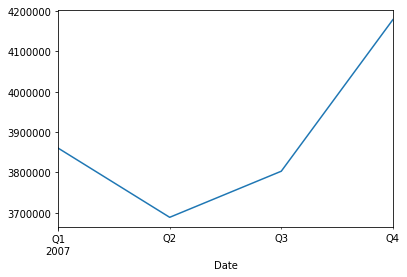

In [0]:
# Resampling and plotting

df_stock.Volume.resample('Q').mean()
df_stock.Volume.resample('Q').mean().plot()

In [0]:
# changing frequency

df_stock.asfreq('W', method = 'pad')

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-07,77.89,77.90,77.01,77.42,2765200
2007-01-14,78.41,79.50,78.22,79.36,2582200
2007-01-21,79.09,79.88,78.82,79.25,2912100
2007-01-28,78.97,79.19,78.23,78.69,1996300
2007-02-04,73.87,74.07,73.72,73.87,5584600
2007-02-11,74.64,75.00,74.25,74.54,4022300
2007-02-18,76.91,77.43,76.41,76.84,3795100
2007-02-25,76.49,76.57,75.95,76.21,1988000
2007-03-04,73.25,73.79,73.00,73.01,5008800


In [0]:
# Creating Date Range

date_range = pd.date_range(start = '2007-07-08', periods = 45, freq = 'B')

In [0]:
# Creating date range considering Holidays

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay


In [0]:
cbd = CustomBusinessDay(calendar = USFederalHolidayCalendar())
date_range = pd.date_range(start = '2007-07-01', periods = 30, freq = cbd)

In [0]:
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday


class IndiaHolidayCalendar(AbstractHolidayCalendar):
  rules = [
      Holiday("Independance Day", month = 8, day = 15, observance = nearest_workday)
  ]
  
indc = CustomBusinessDay(calendar = IndiaHolidayCalendar())

ind_date_range = pd.date_range(start = '2007-08-01', periods = 30, freq = indc)

In [0]:
ind_date_range

DatetimeIndex(['2007-08-01', '2007-08-02', '2007-08-03', '2007-08-06',
               '2007-08-07', '2007-08-08', '2007-08-09', '2007-08-10',
               '2007-08-13', '2007-08-14', '2007-08-16', '2007-08-17',
               '2007-08-20', '2007-08-21', '2007-08-22', '2007-08-23',
               '2007-08-24', '2007-08-27', '2007-08-28', '2007-08-29',
               '2007-08-30', '2007-08-31', '2007-09-03', '2007-09-04',
               '2007-09-05', '2007-09-06', '2007-09-07', '2007-09-10',
               '2007-09-11', '2007-09-12'],
              dtype='datetime64[ns]', freq='C')

In [0]:
# changing a time data to datetime format

dates = [ 'Aug 12, 2008 15:30:00', '2008.09.05', '2008-07-05', '2009/03/11', 'xyz']
pd.to_datetime(dates, errors = 'coerce')

DatetimeIndex(['2008-08-12 15:30:00', '2008-09-05 00:00:00',
               '2008-07-05 00:00:00', '2009-03-11 00:00:00',
                               'NaT'],
              dtype='datetime64[ns]', freq=None)

In [0]:
#Timezone

from pytz import all_timezones
all_timezones
df_stock = df_stock.tz_localize('Asia/Calcutta')
df_stock.tz_convert('Europe/London')

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-02 19:30:00+01:00,77.53,78.85,77.38,78.26,3781700
2007-01-03 19:30:00+01:00,78.40,78.41,77.45,77.95,2969600
2007-01-04 19:30:00+01:00,77.89,77.90,77.01,77.42,2765200
2007-01-07 19:30:00+01:00,77.42,78.04,76.97,77.59,2434500
2007-01-08 19:30:00+01:00,78.00,78.23,77.44,77.68,1896900
2007-01-09 19:30:00+01:00,77.31,77.96,77.04,77.85,1787500
2007-01-10 19:30:00+01:00,78.05,79.03,77.88,78.65,2372500
2007-01-11 19:30:00+01:00,78.41,79.50,78.22,79.36,2582200
2007-01-15 19:30:00+01:00,79.48,79.62,78.92,79.56,2526600


In [0]:
# Shifting

df_stock['Previous Day Volume'] = df_stock['Volume'].shift(1)
df_stock['Next Day Volume'] = df_stock['Volume'].shift(-1)
#df_stock['tshift'] = df_stock['Volume'].tshift(1)